

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [51]:
from IPython.display import IFrame #import IFrame

url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1" #saving url to variable

IFrame(url, width=800, height=500) #load screen


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

### 2 Load, display and clean wikileaks table

Load raw data csv

In [52]:
import pandas as pd

wikileaks_dataframe=pd.read_csv("wikileaks.csv") #loading original

wikileaks_dataframe.head() #display first 5 rows 

,"Casualties detailed in the war logs, month by month",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
1,2004,January,15,51,23,NaN,11
2,2004,February,NaN,7,4,5,2
3,2004,March,19,2,NaN,2,3
4,2004,April,5,3,19,NaN,3


Change columns as they are not the desired names.

In [53]:
wikileaks_dataframe=pd.read_csv("wikileaks.csv", header=1) #adjust column names to correct
wikileaks_dataframe.head() #display first 5 rows

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15,51,23,NaN,11.0
1,2004.0,February,NaN,7,4,5,2.0
2,2004.0,March,19,2,NaN,2,3.0
3,2004.0,April,5,3,19,NaN,3.0
4,2004.0,May,18,29,56,6,9.0


Make dictionary with key as column, value as first value in that column

In [54]:
dictionary = {} #empty dictionary to load with first row values

column_names = list(wikileaks_dataframe.columns) #make columns list #https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/

for column in column_names: #go through each column
    dictionary[column] = wikileaks_dataframe[column].iloc[0] #grab first item from that column #https://www.geeksforgeeks.org/how-to-get-first-row-of-pandas-dataframe/

print(dictionary)

{'Year': 2004.0, 'Month': 'January', 'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': nan, 'Nato - official figures': 11.0}


Clean: extract total values, fill NaN values with 0, make all numbers integers as you cannot have 0.5 years or 0.5 people and current values are in string format.

In [55]:
wikileaks_dataframe.tail() #check bottom, as error found in totals, "," and in wrong columns

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
68,2009.0,September,614,197,133,54,70.0
69,2009.0,October,462,107,86,76,74.0
70,2009.0,November,410,120,69,30,32.0
71,2009.0,December,287,87,65,33,35.0
72,NaN,24498,"15,507","4,024","3,820","1,147",NaN


In [56]:
totals =  wikileaks_dataframe.iloc[-1] #save totals potentially for later

wikileaks_dataframe = wikileaks_dataframe.drop(index=72)  # removes the last row, index 72 is the index of this totals row

column_names.remove("Month") #remove Month as is correctly a string and does not need to be cleaned

for column in column_names: #for every column that need to be cleaned
    wikileaks_dataframe[column].fillna(0, inplace=True) #fill NaN with 0
    wikileaks_dataframe[column] = wikileaks_dataframe[column].astype(int) #change the float or string to integer

wikileaks_dataframe.tail() #display last 5 rows to check correctly cleaning and that totals has been dropped.

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
67,2009,August,445,206,190,64,77
68,2009,September,614,197,133,54,70
69,2009,October,462,107,86,76,74
70,2009,November,410,120,69,30,32
71,2009,December,287,87,65,33,35


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

a) Histogram

In [57]:
import seaborn as sns

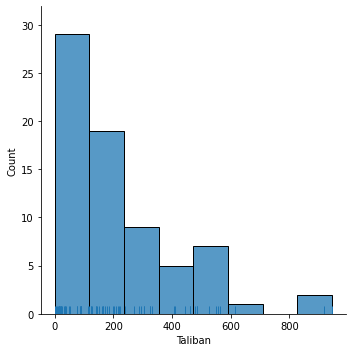

In [58]:
_ = sns.displot(wikileaks_dataframe['Taliban'], kde=False, rug=True) #plot historgram of Taliban casualities (from lab-01-part-01)

b) kde

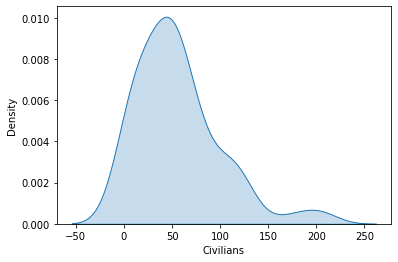

In [59]:
_ = sns.kdeplot(wikileaks_dataframe['Civilians'], fill=True) #plot kernel density plot of Civilian casualities (from lab-01-part-01)

c) Bar and bar-h of categorical variable (total casualities per month)

In [60]:
wikileaks_dataframe.head() #display dataframe

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15,51,23,0,11
1,2004,February,0,7,4,5,2
2,2004,March,19,2,0,2,3
3,2004,April,5,3,19,0,3
4,2004,May,18,29,56,6,9


In [73]:
#Number of deaths per month. (Month is a categorical variable)

#create empty dictionary for each month to later load and make into dataframe
months_total = {"Jan": 0, "Feb": 0, "Mar": 0, "Apr": 0, "May": 0, "Jun": 0, \
                "Jul": 0, "Aug": 0, "Sep": 0, "Oct": 0, "Nov": 0, "Dec": 0}

for index, row in wikileaks_dataframe.iterrows(): #for every row of the dataframe
    current_month=row["Month"][0:3] #take the first three letters of the month
    #calculate the total casualiatilies by adding up each column of that row (not year), add it to the right key value in dictionary
    months_total[current_month]+=row["Taliban"] + row["Civilians"] + row["Afghan forces"] \
        + row["Nato (detailed in spreadsheet)"] + row["Nato - official figures"] 

months_dataframe = pd.DataFrame(list(months_total.items()), columns=['Month', 'Total']) #make the months_total dictionary into a pandas dataframe
months_dataframe.head() #display new month dataframe 

,Month,Total
0,Jan,999
1,Feb,1164
2,Mar,1035
3,Apr,1403
4,May,1993


Vertical bar graph.

<AxesSubplot:title={'center':'Bar graph to show total casualities for each month'}, xlabel='Month'>

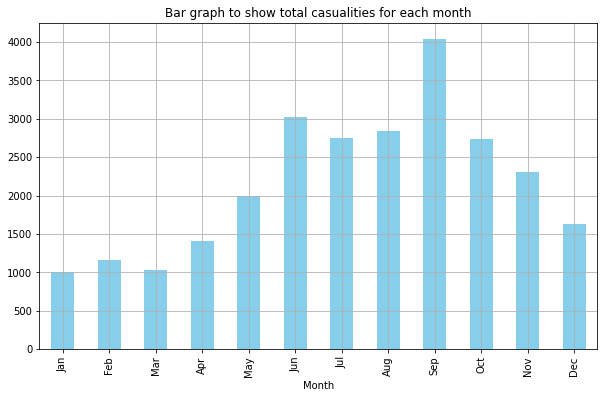

In [62]:
#vertical bar graph of casualities in each month via pandas 
#source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

months_dataframe.plot(x='Month', y='Total', kind='bar', color='skyblue', figsize=(10, 6), grid=True, title='Bar graph to show total casualities for each month', legend=False) 

Horizontal bar graph.

<AxesSubplot:title={'center':'Bar graph to show total casualities for each month'}, ylabel='Month'>

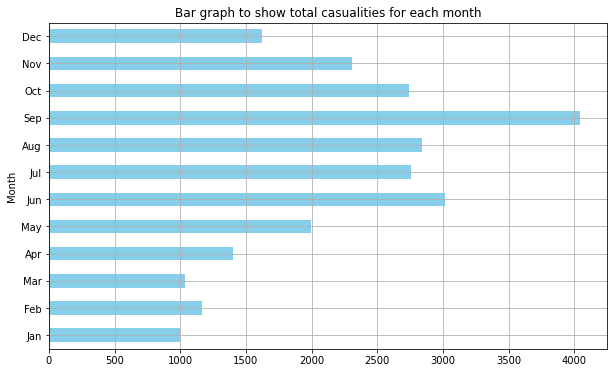

In [63]:
#horiziontal plot
months_dataframe.plot(x='Month', y='Total', kind='barh', color='skyblue', figsize=(10, 6), grid=True, title='Bar graph to show total casualities for each month', legend=False)

When the bar graph becomes horizontal, it is easier to read the month (the categorical variable) as opposed to when the months were displayed at 180 degrees in the vertical bar chart.

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

a) Prints values out of one column in iteration.

In [64]:
def print_each_row(column, dataframe): #define function where you input a dataframe and target column
    for row_value in dataframe[column]: #for every row within that column
        print(row_value) #print that row value

print_each_row("Afghan forces", wikileaks_dataframe) #test with Afghan column and wikileaks dataframe

23
4
0
19
56
14
19
10
16
14
36
7
27
0
2
4
25
4
29
10
29
10
24
16
14
106
61
43
50
39
36
42
97
70
14
36
49
35
48
68
125
98
114
89
144
75
67
55
48
35
19
86
65
58
100
61
57
54
68
52
34
69
94
73
118
133
80
190
133
86
69
65


b) Function that creates new dataframe with rows extracted if certain column values are above a given threshold.

In [71]:

def extract_row_threshold(column, dataframe, threshold): #define new function with threshold input
    extracted_rows=[] #empty list to extract rows into that have values above threshold
    for index, row in dataframe.iterrows(): #for every index and row of the dataframe
        if row[column] > threshold: #if the desired column value is above threshold
            extracted_rows.append(row) #add whole row to the list
    new_dataframe=pd.DataFrame(extracted_rows) #make the list of new rows into pandas dataframe
    return new_dataframe #return pandas dataframe
    

new_dataframe = extract_row_threshold("Afghan forces", wikileaks_dataframe, 10) #test with threshold 10
new_dataframe.head() #display new table


,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15,51,23,0,11
3,2004,April,5,3,19,0,3
4,2004,May,18,29,56,6,9
5,2004,June,163,32,14,2,5
6,2004,July,21,19,19,0,2


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [16]:
wikileaks_dataframe.head() #display table

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15,51,23,0,11
1,2004,February,0,7,4,5,2
2,2004,March,19,2,0,2,3
3,2004,April,5,3,19,0,3
4,2004,May,18,29,56,6,9


Drop the columns we don't need.

In [17]:
target_list = ["Civilians", "Afghan forces"] #groups we are interested in 
columns_to_drop = ["Taliban", "Nato (detailed in spreadsheet)", "Nato - official figures"]  #columns we are not interested in
q5_wikileaks_dataframe = wikileaks_dataframe.drop(columns=columns_to_drop) #drop the uninterested columns and create new dataframe for this question
q5_wikileaks_dataframe.head() #display new dataframe with dropped columns

,Year,Month,Civilians,Afghan forces
0,2004,January,51,23
1,2004,February,7,4
2,2004,March,2,0
3,2004,April,3,19
4,2004,May,29,56


Make new total (afghan + civilians) column.

In [18]:
q5_wikileaks_dataframe["Total"] = q5_wikileaks_dataframe[target_list[0]] + q5_wikileaks_dataframe[target_list[1]] #create new column for total Afghan and civilian casualities
q5_wikileaks_dataframe.head() #display

,Year,Month,Civilians,Afghan forces,Total
0,2004,January,51,23,74
1,2004,February,7,4,11
2,2004,March,2,0,2
3,2004,April,3,19,22
4,2004,May,29,56,85


Make concise table for graph: abbreviated date+year and total casualities value only.

In [19]:
abbreviated_dates = [] #create empty list for new abbreviate month+year date for later use in the graph
for index, row in q5_wikileaks_dataframe.iterrows(): #for every row in dataframe
    abbreviated_month=row['Month'][0:3] #take the first three letters of the month
    abbreviated_year = str(row['Year'])[2:4] #take the last 2 numbers of year
    abbreviated_date=abbreviated_month+abbreviated_year #combine these letters and numbers
    abbreviated_dates.append(abbreviated_date) #add this total date to all abbreviated dates list

concise_q5_data = {"Date":abbreviated_dates, "Total":q5_wikileaks_dataframe["Total"]} #create new dictionary with abbreviated dates and total casuality values
concise_q5_dataframe = pd.DataFrame(concise_q5_data) #convert dictionary into pandas dataframe

concise_q5_dataframe.head() #display

,Date,Total
0,Jan04,74
1,Feb04,11
2,Mar04,2
3,Apr04,22
4,May04,85


Line graph.

<AxesSubplot:title={'center':'Line graph to show total Afghan and civilian casualities over time (month)'}, xlabel='Date'>

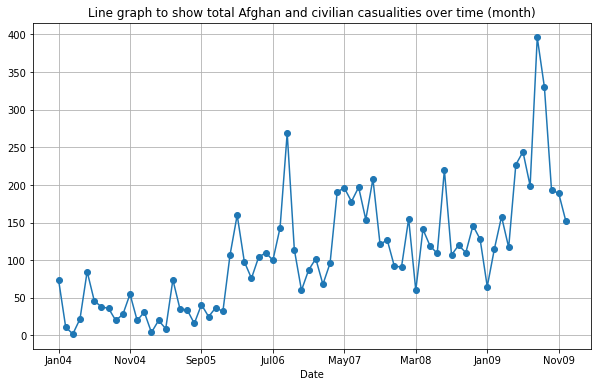

In [26]:
#line graph using pandas of previous made dataframe
concise_q5_dataframe.plot(x='Date', y='Total', kind='line', marker='o', figsize=(10, 6), grid=True, title='Line graph to show total Afghan and civilian casualities over time (per month)', legend=False)

Bar graph.

<AxesSubplot:title={'center':'Bar graph to show total Afghan and civilian casualities over time (month)'}, xlabel='Date'>

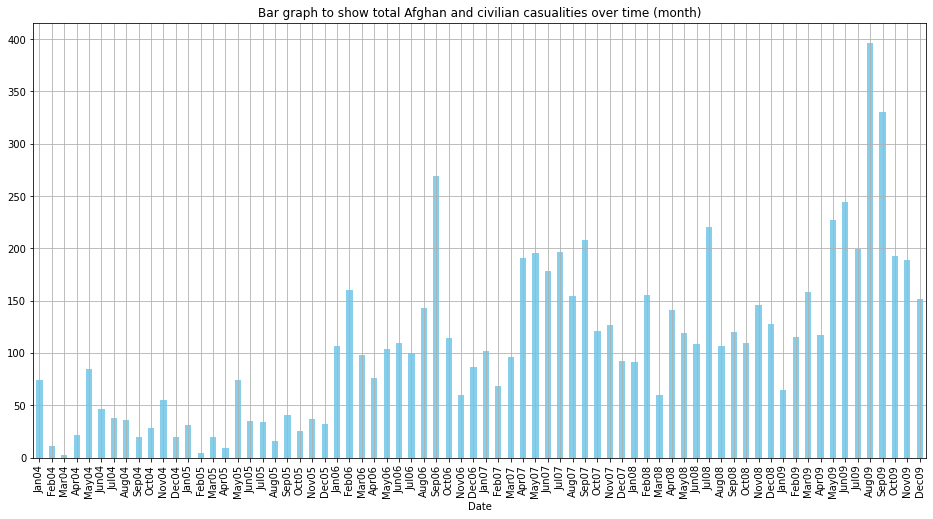

In [27]:
#bar graph using pandas
concise_q5_dataframe.plot(x='Date', y='Total', kind='bar', color='skyblue', figsize=(16, 8), grid=True, title='Bar graph to show total Afghan and civilian casualities over time (per month)', legend=False)